In [1]:
import pandas as pd 

df1 = pd.read_csv('/Users/ahndongsu/Desktop/mlb_pa50_batter_by_gpt.csv') 

In [2]:
df1.head()


,"last_name, first_name",player_id,year,home_run,k_percent,bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,babip,b_rbi,r_run,woba,pull_percent,straightaway_percent,opposite_percent,linedrives_percent
0,"Pujols, Albert",405395,2020,6,15.3,5.5,0.224,0.395,0.270,0.665,0.171,0.230,25,15,0.282,50.0,31.3,18.8,26.6
1,"Cabrera, Miguel",408234,2020,10,22.1,10.4,0.250,0.417,0.329,0.746,0.167,0.283,35,28,0.323,37.4,37.4,25.2,30.3
2,"Mathis, Jeff",425772,2020,3,35.3,7.4,0.161,0.355,0.221,0.576,0.194,0.194,9,6,0.245,51.3,35.9,12.8,30.8
3,"Choo, Shin-Soo",425783,2020,5,26.0,10.2,0.236,0.400,0.323,0.723,0.164,0.284,15,13,0.312,35.4,34.2,30.4,24.1
4,"Molina, Yadier",425877,2020,4,13.5,3.8,0.262,0.359,0.303,0.662,0.097,0.281,16,12,0.290,40.5,41.3,18.3,25.4


<Axes: >

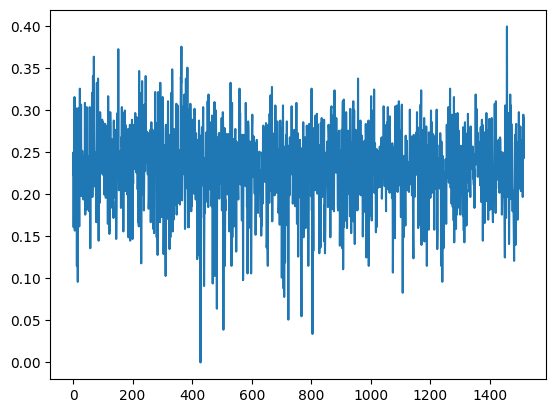

In [3]:
df1['batting_avg'].plot()

In [4]:
# 'year' 열 삭제
df1.drop('year', axis=1, inplace=True)


In [5]:
import pandas as pd

# df2에서 1번째 열을 제외하고 불러옵니다.
df2_subset = df1.iloc[:, 1:]

# player_id 열을 기준으로 다른 열들의 평균을 계산합니다.
# player_id를 그룹화하고, 각 그룹에 대한 평균을 계산합니다.
result = df2_subset.groupby('player_id').mean()

# 결과 출력
print(result)


            home_run  k_percent  bb_percent  batting_avg  slg_percent  \
player_id                                                               
405395     15.666667       15.4    6.066667     0.243333     0.459333   
408234     10.000000       22.6    8.166667     0.253333     0.373333   
425772      3.000000       35.3    7.400000     0.161000     0.355000   
425783      5.000000       26.0   10.200000     0.236000     0.400000   
425784      2.000000       37.2    5.100000     0.232000     0.362000   
...              ...        ...         ...          ...          ...   
683021      0.000000       17.4    7.200000     0.197000     0.230000   
683734     16.000000       19.4    7.150000     0.253000     0.412500   
686469     10.000000       11.4   11.700000     0.295000     0.450000   
686681      4.000000       23.7    4.600000     0.243000     0.376000   
687093      5.000000       21.8    7.100000     0.291000     0.440000   

           on_base_percent  on_base_plus_slg  isol

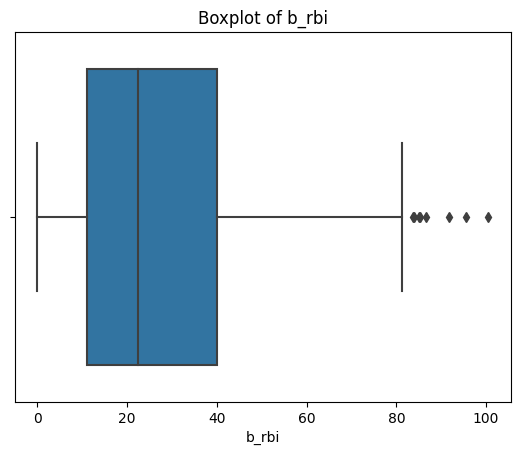

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# result는 데이터프레임으로 가정하고, 'b_rbi'는 확인하려는 열(column)입니다.
# 필요에 따라 데이터를 불러오고, 'b_rbi' 열을 가져오는 코드를 추가해야 합니다.

# 예시 데이터 생성
import pandas as pd
import numpy as np

# 'b_rbi' 열의 상자 수염 그림 그리기
sns.boxplot(x=result['b_rbi'])

# 그래프에 제목 추가
plt.title('Boxplot of b_rbi')

# 그래프 표시
plt.show()


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Min-Max 스케일러를 생성
scaler = MinMaxScaler()
# scaler = StandardScaler()
# player_id 열을 제외한 나머지 열을 선택
columns_to_scale = result.columns.difference(['player_id'])

# 스케일링 적용
result[columns_to_scale] = scaler.fit_transform(result[columns_to_scale])

# 결과 출력
print(result)


           home_run  k_percent  bb_percent  batting_avg  slg_percent  \
player_id                                                              
405395     0.427273   0.152124    0.280864     0.608333     0.742057   
408234     0.272727   0.263320    0.378086     0.633333     0.603123   
425772     0.081818   0.459459    0.342593     0.402500     0.573506   
425783     0.136364   0.315830    0.472222     0.590000     0.646204   
425784     0.054545   0.488803    0.236111     0.580000     0.584814   
...             ...        ...         ...          ...          ...   
683021     0.000000   0.183012    0.333333     0.492500     0.371567   
683734     0.436364   0.213900    0.331019     0.632500     0.666397   
686469     0.272727   0.090347    0.541667     0.737500     0.726979   
686681     0.109091   0.280309    0.212963     0.607500     0.607431   
687093     0.136364   0.250965    0.328704     0.727500     0.710824   

           on_base_percent  on_base_plus_slg  isolated_power   

In [8]:
result.head()

,home_run,k_percent,bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,babip,b_rbi,r_run,woba,pull_percent,straightaway_percent,opposite_percent,linedrives_percent
player_id,,,,,,,,,,,,,,,,
405395,0.427273,0.152124,0.280864,0.608333,0.742057,0.660059,0.738806,0.582210,0.428832,0.474295,0.298611,0.755486,0.761243,0.297279,0.281794,0.375099
408234,0.272727,0.263320,0.378086,0.633333,0.603123,0.697504,0.671642,0.323450,0.554745,0.507463,0.350694,0.707680,0.453042,0.464626,0.430388,0.463357
425772,0.081818,0.459459,0.342593,0.402500,0.573506,0.486784,0.560675,0.522911,0.354015,0.089552,0.062500,0.576019,0.797619,0.418367,0.126506,0.579196
425783,0.136364,0.315830,0.472222,0.590000,0.646204,0.711454,0.703764,0.442049,0.518248,0.149254,0.135417,0.733542,0.482143,0.383673,0.479920,0.420804
425784,0.054545,0.488803,0.236111,0.580000,0.584814,0.645374,0.637573,0.350404,0.671533,0.089552,0.083333,0.677116,0.748016,0.255102,0.337349,0.290780


In [9]:
result.isna().sum()

home_run                0
k_percent               0
bb_percent              0
batting_avg             0
slg_percent             0
on_base_percent         0
on_base_plus_slg        0
isolated_power          0
babip                   0
b_rbi                   0
r_run                   0
woba                    0
pull_percent            0
straightaway_percent    0
opposite_percent        0
linedrives_percent      0
dtype: int64

In [10]:
# 'year' 열 삭제
result.drop('Unnamed: 19', axis=1, inplace=True)


KeyError: "['Unnamed: 19'] not found in axis"

In [ ]:
result.head()

,home_run,k_percent,bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,babip,b_rbi,r_run,woba,pull_percent,straightaway_percent,opposite_percent,linedrives_percent
player_id,,,,,,,,,,,,,,,,
405395,0.427273,0.152124,0.280864,0.608333,0.742057,0.660059,0.738806,0.582210,0.428832,0.474295,0.298611,0.755486,0.761243,0.297279,0.281794,0.375099
408234,0.272727,0.263320,0.378086,0.633333,0.603123,0.697504,0.671642,0.323450,0.554745,0.507463,0.350694,0.707680,0.453042,0.464626,0.430388,0.463357
425772,0.081818,0.459459,0.342593,0.402500,0.573506,0.486784,0.560675,0.522911,0.354015,0.089552,0.062500,0.576019,0.797619,0.418367,0.126506,0.579196
425783,0.136364,0.315830,0.472222,0.590000,0.646204,0.711454,0.703764,0.442049,0.518248,0.149254,0.135417,0.733542,0.482143,0.383673,0.479920,0.420804
425784,0.054545,0.488803,0.236111,0.580000,0.584814,0.645374,0.637573,0.350404,0.671533,0.089552,0.083333,0.677116,0.748016,0.255102,0.337349,0.290780


In [ ]:
result.isna().sum()

home_run                0
k_percent               0
bb_percent              0
batting_avg             0
slg_percent             0
on_base_percent         0
on_base_plus_slg        0
isolated_power          0
babip                   0
b_rbi                   0
r_run                   0
woba                    0
pull_percent            0
straightaway_percent    0
opposite_percent        0
linedrives_percent      0
dtype: int64

In [ ]:
result.head()

,home_run,k_percent,bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,babip,b_rbi,r_run,woba,pull_percent,straightaway_percent,opposite_percent,linedrives_percent
player_id,,,,,,,,,,,,,,,,
405395,0.427273,0.152124,0.280864,0.608333,0.742057,0.660059,0.738806,0.582210,0.428832,0.474295,0.298611,0.755486,0.761243,0.297279,0.281794,0.375099
408234,0.272727,0.263320,0.378086,0.633333,0.603123,0.697504,0.671642,0.323450,0.554745,0.507463,0.350694,0.707680,0.453042,0.464626,0.430388,0.463357
425772,0.081818,0.459459,0.342593,0.402500,0.573506,0.486784,0.560675,0.522911,0.354015,0.089552,0.062500,0.576019,0.797619,0.418367,0.126506,0.579196
425783,0.136364,0.315830,0.472222,0.590000,0.646204,0.711454,0.703764,0.442049,0.518248,0.149254,0.135417,0.733542,0.482143,0.383673,0.479920,0.420804
425784,0.054545,0.488803,0.236111,0.580000,0.584814,0.645374,0.637573,0.350404,0.671533,0.089552,0.083333,0.677116,0.748016,0.255102,0.337349,0.290780


In [ ]:
result.columns

Index(['home_run', 'k_percent', 'bb_percent', 'batting_avg', 'slg_percent',
       'on_base_percent', 'on_base_plus_slg', 'isolated_power', 'babip',
       'b_rbi', 'r_run', 'woba', 'pull_percent', 'straightaway_percent',
       'opposite_percent', 'linedrives_percent'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [ ]:
data = result[['home_run', 'k_percent', 'bb_percent', 'batting_avg', 'slg_percent',
              'on_base_percent', 'on_base_plus_slg', 'isolated_power', 'babip',
              'b_rbi', 'r_run', 'woba', 'pull_percent', 'straightaway_percent',
              'opposite_percent', 'linedrives_percent']]


# DBSCAN시작

In [ ]:
# import pandas as pd
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import silhouette_score
# import numpy as np

# # 데이터프레임 불러오기
# # 여기에서 'df'는 데이터프레임을 나타내는 변수 이름입니다.
# # 데이터프레임에서 선택한 열을 가져옵니다.
# selected_columns = result[['home_run', 'k_percent', 'bb_percent', 'batting_avg', 'slg_percent',
#                       'on_base_percent', 'on_base_plus_slg', 'isolated_power', 'babip',
#                       'b_rbi', 'r_run', 'woba', 'pull_percent', 'straightaway_percent',
#                       'opposite_percent', 'linedrives_percent']]

# # 그리드 서치를 위한 파라미터 범위 설정
# eps_range = np.arange(0.1, 15.0, 0.1)
# min_samples_range = range(1, 7)

# best_eps = None
# best_min_samples = None
# best_silhouette_score = -1

# # 그리드 서치 실행
# for eps in eps_range:
#     for min_samples in min_samples_range:
#         dbscan = DBSCAN(eps=eps, min_samples=min_samples)
#         cluster_labels = dbscan.fit_predict(result)
#         if len(np.unique(cluster_labels)) > 1:  # Ensure more than one cluster
#             silhouette_avg = silhouette_score(result, cluster_labels)
#             if silhouette_avg > best_silhouette_score:
#                 best_silhouette_score = silhouette_avg
#                 best_eps = eps
#                 best_min_samples = min_samples

# # 최적의 매개변수 출력
# print("Best eps:", best_eps)
# print("Best min_samples:", best_min_samples)
# print("Best Silhouette Score:", best_silhouette_score)


In [ ]:
# dbscan = DBSCAN(eps=0.5, min_samples=5)
# dbscan.fit(result)

# # 각 데이터 포인트의 클러스터 레이블을 얻습니다.
# cluster_labels = dbscan.labels_

# # 클러스터 레이블을 출력합니다.
# print("Cluster Labels:", cluster_labels)

In [ ]:
# result['Batter_Cluster_Lable_DS']= cluster_labels

In [ ]:
# result.tail()

In [ ]:
# result['Batter_Cluster_Lable_DS'].value_counts()

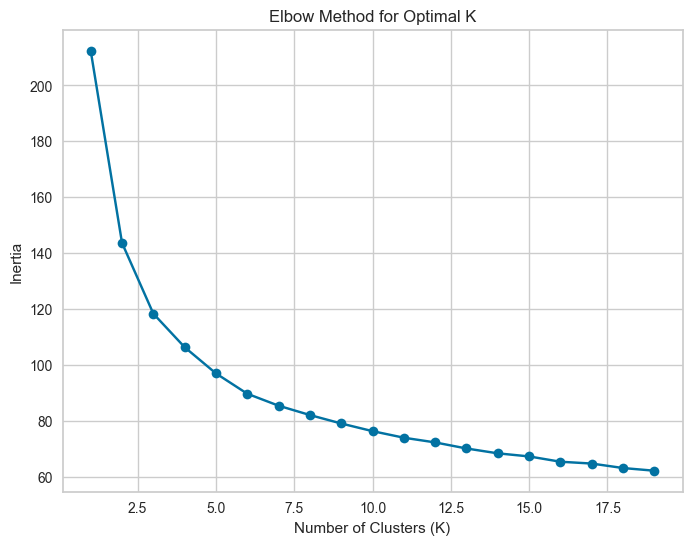

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 스케일된 데이터
scaled_data = result.iloc[:, 1:].values

# 클러스터 수 범위를 정의합니다.
k_values = range(1, 20)  # 예시로 1에서 10까지의 클러스터 수를 시도합니다.

# 각 K 값에 대한 이너셔 값을 저장할 리스트
inertia_values = []

# 다양한 K 값에 대해 K-Means 클러스터링을 수행하고 이너셔 값을 계산
for k in k_values:
    kmeans = KMeans(n_init=20,n_clusters=k, init="k-means++", random_state=0)
    kmeans.fit(scaled_data)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

# 이너셔 값을 그래프로 표시
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


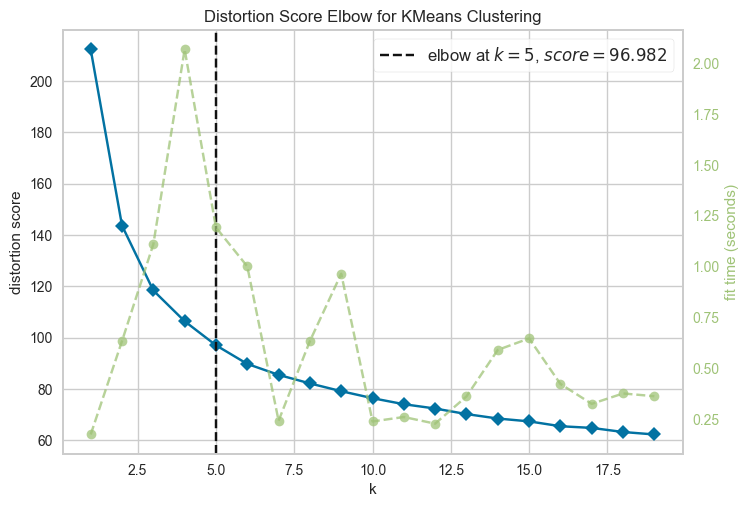

Optimal K:  5


In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 스케일된 데이터
scaled_data = result.iloc[:, 1:].values

# KMeans 모델을 생성
model = KMeans(n_init=20,init="k-means++", random_state=0)

# KElbowVisualizer를 사용하여 최적의 클러스터 수를 선택
visualizer = KElbowVisualizer(model, k=(1, 20))
visualizer.fit(scaled_data)  # 데이터를 모델에 적합

# Elbow 그래프를 시각화
visualizer.poof()  # 그래프를 보여줍니다.

# 선택된 최적의 클러스터 수
optimal_k = visualizer.elbow_value_
print("Optimal K: ", optimal_k)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 스케일된 데이터
scaled_data = result.iloc[:, 1:].values

# K-Means 클러스터링 (5개의 클러스터)
kmeans = KMeans(n_init=20,n_clusters=5,init="k-means++",random_state=0)
kmeans.fit(scaled_data)

# 클러스터 레이블 얻기
cluster_labels = kmeans.labels_

# Silhouette Score 계산
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.17954814446389533


In [ ]:
import pandas as pd

# 스케일된 데이터
scaled_data = result.iloc[:, 1:].values

# K-Means 클러스터링 (5개의 클러스터)
kmeans = KMeans(n_init=20,n_clusters=5, init="k-means++",random_state=0)
kmeans.fit(scaled_data)

# 클러스터 레이블 얻기
cluster_labels = kmeans.labels_

# Silhouette Score 계산
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# 결과를 기존 데이터프레임에 추가
result['Batter_Cluster_Label'] = cluster_labels

# player_id에 속한 클러스터를 나타내는 열을 추가한 결과를 출력
print(result)
result.head()

Silhouette Score: 0.17954814446389533
           home_run  k_percent  bb_percent  batting_avg  slg_percent  \
player_id                                                              
405395     0.427273   0.152124    0.280864     0.608333     0.742057   
408234     0.272727   0.263320    0.378086     0.633333     0.603123   
425772     0.081818   0.459459    0.342593     0.402500     0.573506   
425783     0.136364   0.315830    0.472222     0.590000     0.646204   
425784     0.054545   0.488803    0.236111     0.580000     0.584814   
...             ...        ...         ...          ...          ...   
683021     0.000000   0.183012    0.333333     0.492500     0.371567   
683734     0.436364   0.213900    0.331019     0.632500     0.666397   
686469     0.272727   0.090347    0.541667     0.737500     0.726979   
686681     0.109091   0.280309    0.212963     0.607500     0.607431   
687093     0.136364   0.250965    0.328704     0.727500     0.710824   

           on_base_percen

,home_run,k_percent,bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,babip,b_rbi,r_run,woba,pull_percent,straightaway_percent,opposite_percent,linedrives_percent,Batter_Cluster_Label
player_id,,,,,,,,,,,,,,,,,
405395,0.427273,0.152124,0.280864,0.608333,0.742057,0.660059,0.738806,0.582210,0.428832,0.474295,0.298611,0.755486,0.761243,0.297279,0.281794,0.375099,0
408234,0.272727,0.263320,0.378086,0.633333,0.603123,0.697504,0.671642,0.323450,0.554745,0.507463,0.350694,0.707680,0.453042,0.464626,0.430388,0.463357,2
425772,0.081818,0.459459,0.342593,0.402500,0.573506,0.486784,0.560675,0.522911,0.354015,0.089552,0.062500,0.576019,0.797619,0.418367,0.126506,0.579196,0
425783,0.136364,0.315830,0.472222,0.590000,0.646204,0.711454,0.703764,0.442049,0.518248,0.149254,0.135417,0.733542,0.482143,0.383673,0.479920,0.420804,0
425784,0.054545,0.488803,0.236111,0.580000,0.584814,0.645374,0.637573,0.350404,0.671533,0.089552,0.083333,0.677116,0.748016,0.255102,0.337349,0.290780,0


In [ ]:
result.columns

Index(['home_run', 'k_percent', 'bb_percent', 'batting_avg', 'slg_percent',
       'on_base_percent', 'on_base_plus_slg', 'isolated_power', 'babip',
       'b_rbi', 'r_run', 'woba', 'pull_percent', 'straightaway_percent',
       'opposite_percent', 'linedrives_percent', 'Batter_Cluster_Label'],
      dtype='object')

In [ ]:
result[result['Batter_Cluster_Label'] == 1].mean()

home_run                0.504800
k_percent               0.264703
bb_percent              0.440462
batting_avg             0.647515
slg_percent             0.752548
on_base_percent         0.742365
on_base_plus_slg        0.781500
isolated_power          0.557471
babip                   0.546535
b_rbi                   0.584780
r_run                   0.620472
woba                    0.809638
pull_percent            0.557017
straightaway_percent    0.428248
opposite_percent        0.360252
linedrives_percent      0.417751
Batter_Cluster_Label    1.000000
dtype: float64

In [ ]:
result[result['Batter_Cluster_Label'] == 1].count()



home_run                143
k_percent               143
bb_percent              143
batting_avg             143
slg_percent             143
on_base_percent         143
on_base_plus_slg        143
isolated_power          143
babip                   143
b_rbi                   143
r_run                   143
woba                    143
pull_percent            143
straightaway_percent    143
opposite_percent        143
linedrives_percent      143
Batter_Cluster_Label    143
dtype: int64

In [ ]:
result.to_csv('/Users/ahndongsu/Desktop/kmeans_batter_by_thesis_pa50.csv', index = True)

In [ ]:
data=pd.read_csv('/Users/ahndongsu/Desktop/kmeans_batter_by_thesis_pa50.csv')
data.head()

,player_id,home_run,k_percent,bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,babip,b_rbi,r_run,woba,pull_percent,straightaway_percent,opposite_percent,linedrives_percent,Batter_Cluster_Label
0,405395,0.427273,0.152124,0.280864,0.608333,0.742057,0.660059,0.738806,0.582210,0.428832,0.474295,0.298611,0.755486,0.761243,0.297279,0.281794,0.375099,0
1,408234,0.272727,0.263320,0.378086,0.633333,0.603123,0.697504,0.671642,0.323450,0.554745,0.507463,0.350694,0.707680,0.453042,0.464626,0.430388,0.463357,2
2,425772,0.081818,0.459459,0.342593,0.402500,0.573506,0.486784,0.560675,0.522911,0.354015,0.089552,0.062500,0.576019,0.797619,0.418367,0.126506,0.579196,0
3,425783,0.136364,0.315830,0.472222,0.590000,0.646204,0.711454,0.703764,0.442049,0.518248,0.149254,0.135417,0.733542,0.482143,0.383673,0.479920,0.420804,0
4,425784,0.054545,0.488803,0.236111,0.580000,0.584814,0.645374,0.637573,0.350404,0.671533,0.089552,0.083333,0.677116,0.748016,0.255102,0.337349,0.290780,0


In [ ]:
# player_id를 key로 사용하여 두 데이터프레임을 조인
df2 = df1.merge(data[['player_id', 'Batter_Cluster_Label']], on='player_id', how='inner')

# 결과 데이터프레임에 Batter_Cluster_Label 컬럼이 추가됨


In [ ]:
# player_id를 key로 사용하여 두 데이터프레임을 조인
df2 = df1.merge(data[['player_id', 'Batter_Cluster_Label']], on='player_id', how='inner')

# 결과 데이터프레임에 Batter_Cluster_Label 컬럼이 추가됨
df2.head()


,"last_name, first_name",player_id,home_run,k_percent,bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,babip,b_rbi,r_run,woba,pull_percent,straightaway_percent,opposite_percent,linedrives_percent,Batter_Cluster_Label
0,"Pujols, Albert",405395,6,15.3,5.5,0.224,0.395,0.270,0.665,0.171,0.230,25,15,0.282,50.0,31.3,18.8,26.6,0
1,"Pujols, Albert",405395,17,15.2,4.7,0.236,0.433,0.284,0.717,0.197,0.223,50,29,0.302,46.1,28.4,25.4,19.4,0
2,"Pujols, Albert",405395,24,15.7,8.0,0.270,0.550,0.345,0.895,0.280,0.252,68,42,0.380,52.3,30.2,17.4,20.5,0
3,"Cabrera, Miguel",408234,10,22.1,10.4,0.250,0.417,0.329,0.746,0.167,0.283,35,28,0.323,37.4,37.4,25.2,30.3,2
4,"Cabrera, Miguel",408234,15,22.4,7.6,0.256,0.386,0.316,0.702,0.130,0.305,75,48,0.305,32.8,37.2,30.0,21.5,2


In [ ]:
df2 = df2.drop("last_name, first_name", axis=1)

In [ ]:
df2 = df2.drop("Unnamed: 19", axis=1)

KeyError: "['Unnamed: 19'] not found in axis"

In [ ]:
df2.head()

,player_id,home_run,k_percent,bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,isolated_power,babip,b_rbi,r_run,woba,pull_percent,straightaway_percent,opposite_percent,linedrives_percent,Batter_Cluster_Label
0,405395,6,15.3,5.5,0.224,0.395,0.270,0.665,0.171,0.230,25,15,0.282,50.0,31.3,18.8,26.6,0
1,405395,17,15.2,4.7,0.236,0.433,0.284,0.717,0.197,0.223,50,29,0.302,46.1,28.4,25.4,19.4,0
2,405395,24,15.7,8.0,0.270,0.550,0.345,0.895,0.280,0.252,68,42,0.380,52.3,30.2,17.4,20.5,0
3,408234,10,22.1,10.4,0.250,0.417,0.329,0.746,0.167,0.283,35,28,0.323,37.4,37.4,25.2,30.3,2
4,408234,15,22.4,7.6,0.256,0.386,0.316,0.702,0.130,0.305,75,48,0.305,32.8,37.2,30.0,21.5,2


In [ ]:
df2[df2['Batter_Cluster_Label'] == 0].mean()

player_id               603417.239067
home_run                     7.061224
k_percent                   27.991837
bb_percent                   9.123907
batting_avg                  0.220673
slg_percent                  0.398044
on_base_percent              0.300496
on_base_plus_slg             0.698539
isolated_power               0.177370
babip                        0.276685
b_rbi                       22.338192
r_run                       21.822157
woba                         0.303962
pull_percent                42.494461
straightaway_percent        34.931487
opposite_percent            22.566472
linedrives_percent          23.218659
Batter_Cluster_Label         0.000000
dtype: float64

In [ ]:
df2[df2['Batter_Cluster_Label'] == 1].mean()

player_id               601025.583770
home_run                    18.654450
k_percent                   22.537696
bb_percent                   9.612304
batting_avg                  0.258607
slg_percent                  0.467107
on_base_percent              0.337469
on_base_plus_slg             0.804576
isolated_power               0.208500
babip                        0.297615
b_rbi                       58.924084
r_run                       59.369110
woba                         0.344783
pull_percent                39.296597
straightaway_percent        36.284031
opposite_percent            24.417277
linedrives_percent          23.981414
Batter_Cluster_Label         1.000000
dtype: float64

In [ ]:
df2[df2['Batter_Cluster_Label'] == 2].mean()

player_id               605038.808559
home_run                     6.664414
k_percent                   20.370495
bb_percent                   7.442117
batting_avg                  0.255662
slg_percent                  0.386908
on_base_percent              0.318083
on_base_plus_slg             0.704991
isolated_power               0.131245
babip                        0.306282
b_rbi                       31.736486
r_run                       34.788288
woba                         0.308131
pull_percent                34.441667
straightaway_percent        38.713063
opposite_percent            26.850676
linedrives_percent          25.043694
Batter_Cluster_Label         2.000000
dtype: float64

In [ ]:
df2[df2['Batter_Cluster_Label'] == 3].mean()

player_id               575123.740741
home_run                     0.148148
k_percent                   45.270370
bb_percent                   3.466667
batting_avg                  0.114481
slg_percent                  0.146556
on_base_percent              0.149889
on_base_plus_slg             0.296444
isolated_power               0.032074
babip                        0.235852
b_rbi                        2.370370
r_run                        2.185185
woba                         0.135556
pull_percent                23.829630
straightaway_percent        42.029630
opposite_percent            34.133333
linedrives_percent          15.788889
Batter_Cluster_Label         3.000000
dtype: float64

In [ ]:
df2[df2['Batter_Cluster_Label'] == 4].mean()

player_id               613002.557632
home_run                     2.464174
k_percent                   26.321807
bb_percent                   7.538629
batting_avg                  0.195134
slg_percent                  0.291349
on_base_percent              0.264735
on_base_plus_slg             0.556084
isolated_power               0.096215
babip                        0.255801
b_rbi                       11.613707
r_run                       13.813084
woba                         0.248919
pull_percent                37.227414
straightaway_percent        37.523988
opposite_percent            25.249221
linedrives_percent          22.097819
Batter_Cluster_Label         4.000000
dtype: float64

### 이제 투수 데이터 kmeans

In [11]:
import pandas as pd 

df1 = pd.read_csv('/Users/ahndongsu/Desktop/mlb_pa50_pitcher_by_thesis.csv') 


In [12]:
df1.shape

(1766, 31)

In [13]:
df1.head()

,"last_name, first_name",player_id,year,p_formatted_ip,k_percent,bb_percent,slg_percent,isolated_power,p_earned_run,p_era,...,n_sift_formatted,n_fc_formatted,n_fs_formatted,n_kn_formatted,n_fastball_formatted,fastball_avg_speed,n_breaking_formatted,breaking_avg_speed,breaking_avg_break,n_offspeed_formatted
0,"Perez, Oliver",424144,2020,18.0,19.4,8.3,0.258,0.048,4,2.00,...,43.1,NaN,NaN,NaN,56.9,89.9,43.1,76.1,10.3,NaN
1,"Wainwright, Adam",425794,2020,65.2,20.6,5.7,0.369,0.148,23,3.15,...,27.1,22.9,NaN,NaN,59.2,87.6,38.3,73.5,22.0,2.5
2,"Greinke, Zack",425844,2020,67.0,24.5,3.3,0.405,0.149,30,4.03,...,0.1,NaN,NaN,NaN,43.5,88.1,33.2,77.7,12.2,23.3
3,"Petit, Yusmeiro",433589,2020,21.2,19.3,5.7,0.366,0.134,4,1.66,...,NaN,28.6,NaN,NaN,71.1,86.7,10.8,74.3,13.3,18.1
4,"Sanchez, Anibal",434671,2020,53.0,17.6,7.3,0.536,0.223,39,6.62,...,7.9,23.1,29.1,NaN,57.8,88.6,6.6,76.8,4.9,35.6


In [14]:
df1.isna().sum()

last_name, first_name       0
player_id                   0
year                        0
p_formatted_ip              0
k_percent                   0
bb_percent                  0
slg_percent                 0
isolated_power              0
p_earned_run                0
p_era                       0
woba                        0
exit_velocity_avg           0
barrel_batted_rate          0
hard_hit_percent            0
groundballs_percent         0
flyballs_percent            0
popups_percent              0
n_ff_formatted             88
n_sl_formatted            415
n_ch_formatted            408
n_cukc_formatted          668
n_sift_formatted          599
n_fc_formatted           1208
n_fs_formatted           1604
n_kn_formatted           1766
n_fastball_formatted        0
fastball_avg_speed          0
n_breaking_formatted       18
breaking_avg_speed         18
breaking_avg_break         18
n_offspeed_formatted      276
dtype: int64

In [15]:
df1.columns

Index(['last_name, first_name', 'player_id', 'year', 'p_formatted_ip',
       'k_percent', 'bb_percent', 'slg_percent', 'isolated_power',
       'p_earned_run', 'p_era', 'woba', 'exit_velocity_avg',
       'barrel_batted_rate', 'hard_hit_percent', 'groundballs_percent',
       'flyballs_percent', 'popups_percent', 'n_ff_formatted',
       'n_sl_formatted', 'n_ch_formatted', 'n_cukc_formatted',
       'n_sift_formatted', 'n_fc_formatted', 'n_fs_formatted',
       'n_kn_formatted', 'n_fastball_formatted', 'fastball_avg_speed',
       'n_breaking_formatted', 'breaking_avg_speed', 'breaking_avg_break',
       'n_offspeed_formatted'],
      dtype='object')

In [16]:
# 'n_ff_formatted',
#        'n_sl_formatted', 'n_ch_formatted', 'n_cukc_formatted',
#        'n_sift_formatted', 'n_fc_formatted', 'n_fs_formatted',
#        'n_kn_formatted', 'n_fastball_formatted','n_breaking_formatted','n_offspeed_formatted','Unnamed: 31'

In [17]:
df1.head()

,"last_name, first_name",player_id,year,p_formatted_ip,k_percent,bb_percent,slg_percent,isolated_power,p_earned_run,p_era,...,n_sift_formatted,n_fc_formatted,n_fs_formatted,n_kn_formatted,n_fastball_formatted,fastball_avg_speed,n_breaking_formatted,breaking_avg_speed,breaking_avg_break,n_offspeed_formatted
0,"Perez, Oliver",424144,2020,18.0,19.4,8.3,0.258,0.048,4,2.00,...,43.1,NaN,NaN,NaN,56.9,89.9,43.1,76.1,10.3,NaN
1,"Wainwright, Adam",425794,2020,65.2,20.6,5.7,0.369,0.148,23,3.15,...,27.1,22.9,NaN,NaN,59.2,87.6,38.3,73.5,22.0,2.5
2,"Greinke, Zack",425844,2020,67.0,24.5,3.3,0.405,0.149,30,4.03,...,0.1,NaN,NaN,NaN,43.5,88.1,33.2,77.7,12.2,23.3
3,"Petit, Yusmeiro",433589,2020,21.2,19.3,5.7,0.366,0.134,4,1.66,...,NaN,28.6,NaN,NaN,71.1,86.7,10.8,74.3,13.3,18.1
4,"Sanchez, Anibal",434671,2020,53.0,17.6,7.3,0.536,0.223,39,6.62,...,7.9,23.1,29.1,NaN,57.8,88.6,6.6,76.8,4.9,35.6


In [18]:
df1 = df1.drop('year', axis=1)


In [19]:
# df1 = df1.drop('last_name, first_name', axis=1)


In [20]:
# # 위에서 설명한 데이터프레임을 기반으로 코드를 작성합니다.
# # 아래 열을 제거하려고 합니다.
# columns_to_remove = ['n_ff_formatted', 'n_sl_formatted', 'n_ch_formatted', 'n_cukc_formatted',
#                      'n_sift_formatted', 'n_fc_formatted', 'n_fs_formatted', 'n_kn_formatted',
#                      'n_fastball_formatted', 'n_breaking_formatted', 'n_offspeed_formatted', 'Unnamed: 31']

# # 데이터프레임에서 열을 제거합니다.
# df1 = df1.drop(columns=columns_to_remove)


In [21]:
import pandas as pd

# df2에서 1번째 열을 제외하고 불러옵니다.
df2_subset = df1.iloc[:, 1:]

# player_id 열을 기준으로 다른 열들의 평균을 계산합니다.
# player_id를 그룹화하고, 각 그룹에 대한 평균을 계산합니다.
result = df2_subset.groupby('player_id').mean()

# 결과 출력
print(result)


           p_formatted_ip  k_percent  bb_percent  slg_percent  isolated_power  \
player_id                                                                       
424144          18.000000  19.400000    8.300000     0.258000        0.048000   
425794         154.166667  19.800000    6.133333     0.367667        0.133667   
425844         125.000000  18.066667    4.366667     0.418667        0.154000   
429722          65.100000  18.800000    7.900000     0.446000        0.187000   
431148          11.100000  18.200000   10.900000     0.563000        0.250000   
...                   ...        ...         ...          ...             ...   
686752          36.100000  26.300000   16.900000     0.369000        0.169000   
686753          24.100000  24.500000    7.100000     0.333000        0.111000   
686973          26.000000  19.800000    5.700000     0.455000        0.192000   
689225          81.200000  15.900000    7.400000     0.411000        0.175000   
693821          54.000000  2

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# Min-Max 스케일러를 생성
scaler = MinMaxScaler()

# player_id 열을 제외한 나머지 열을 선택
columns_to_scale = result.columns.difference(['player_id'])

# 스케일링 적용
result[columns_to_scale] = scaler.fit_transform(result[columns_to_scale])

# 결과 출력
print(result)


           p_formatted_ip  k_percent  bb_percent  slg_percent  isolated_power  \
player_id                                                                       
424144           0.057193   0.326260    0.230508     0.189038        0.056075   
425794           0.851863   0.336870    0.157062     0.311708        0.216199   
425844           0.681646   0.290893    0.097175     0.368755        0.254206   
429722           0.332069   0.310345    0.216949     0.399329        0.315888   
431148           0.016924   0.294430    0.318644     0.530201        0.433645   
...                   ...        ...         ...          ...             ...   
686752           0.162825   0.509284    0.522034     0.313199        0.282243   
686753           0.092793   0.461538    0.189831     0.272931        0.173832   
686973           0.103881   0.336870    0.142373     0.409396        0.325234   
689225           0.426029   0.233422    0.200000     0.360179        0.293458   
693821           0.267289   

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [23]:
result.isna().sum()

p_formatted_ip            0
k_percent                 0
bb_percent                0
slg_percent               0
isolated_power            0
p_earned_run              0
p_era                     0
woba                      0
exit_velocity_avg         0
barrel_batted_rate        0
hard_hit_percent          0
groundballs_percent       0
flyballs_percent          0
popups_percent            0
n_ff_formatted           35
n_sl_formatted          170
n_ch_formatted          184
n_cukc_formatted        330
n_sift_formatted        270
n_fc_formatted          602
n_fs_formatted          823
n_kn_formatted          917
n_fastball_formatted      0
fastball_avg_speed        0
n_breaking_formatted      7
breaking_avg_speed        7
breaking_avg_break        7
n_offspeed_formatted    118
dtype: int64

In [24]:
result = result.drop('Unnamed: 31', axis=1)

KeyError: "['Unnamed: 31'] not found in axis"

In [25]:
result = result.drop('n_kn_formatted', axis=1)

In [26]:
result.isna().sum()

p_formatted_ip            0
k_percent                 0
bb_percent                0
slg_percent               0
isolated_power            0
p_earned_run              0
p_era                     0
woba                      0
exit_velocity_avg         0
barrel_batted_rate        0
hard_hit_percent          0
groundballs_percent       0
flyballs_percent          0
popups_percent            0
n_ff_formatted           35
n_sl_formatted          170
n_ch_formatted          184
n_cukc_formatted        330
n_sift_formatted        270
n_fc_formatted          602
n_fs_formatted          823
n_fastball_formatted      0
fastball_avg_speed        0
n_breaking_formatted      7
breaking_avg_speed        7
breaking_avg_break        7
n_offspeed_formatted    118
dtype: int64

In [27]:
result.dropna(subset=['breaking_avg_speed'], inplace=True)

In [28]:
result.isna().sum()

p_formatted_ip            0
k_percent                 0
bb_percent                0
slg_percent               0
isolated_power            0
p_earned_run              0
p_era                     0
woba                      0
exit_velocity_avg         0
barrel_batted_rate        0
hard_hit_percent          0
groundballs_percent       0
flyballs_percent          0
popups_percent            0
n_ff_formatted           35
n_sl_formatted          163
n_ch_formatted          182
n_cukc_formatted        323
n_sift_formatted        267
n_fc_formatted          602
n_fs_formatted          817
n_fastball_formatted      0
fastball_avg_speed        0
n_breaking_formatted      0
breaking_avg_speed        0
breaking_avg_break        0
n_offspeed_formatted    117
dtype: int64

In [29]:
result.head()

,p_formatted_ip,k_percent,bb_percent,slg_percent,isolated_power,p_earned_run,p_era,woba,exit_velocity_avg,barrel_batted_rate,...,n_cukc_formatted,n_sift_formatted,n_fc_formatted,n_fs_formatted,n_fastball_formatted,fastball_avg_speed,n_breaking_formatted,breaking_avg_speed,breaking_avg_break,n_offspeed_formatted
player_id,,,,,,,,,,,,,,,,,,,,,
424144,0.057193,0.326260,0.230508,0.189038,0.056075,0.047619,0.107009,0.222958,0.353846,0.182222,...,NaN,0.524710,NaN,NaN,0.513544,0.394444,0.484493,0.240385,0.394231,NaN
425794,0.851863,0.336870,0.157062,0.311708,0.216199,0.682540,0.176743,0.314202,0.405128,0.281481,...,0.563288,0.338011,0.296912,NaN,0.554929,0.250000,0.385779,0.105769,0.959936,0.062065
425844,0.681646,0.290893,0.097175,0.368755,0.254206,0.654762,0.211700,0.363503,0.423077,0.318519,...,0.288767,0.031320,0.095847,NaN,0.417607,0.314815,0.345688,0.258013,0.540064,0.261347
429722,0.332069,0.310345,0.216949,0.399329,0.315888,0.404762,0.250401,0.408389,0.592308,0.484444,...,NaN,NaN,NaN,NaN,0.380361,0.588889,0.580938,0.639423,0.158654,0.040532
431148,0.016924,0.294430,0.318644,0.530201,0.433645,0.095238,0.339754,0.562914,0.738462,0.586667,...,NaN,NaN,NaN,NaN,0.487585,0.533333,0.159985,0.769231,0.302885,0.390120


In [30]:
result.fillna(0, inplace=True)


In [31]:
result.isna().sum()

p_formatted_ip          0
k_percent               0
bb_percent              0
slg_percent             0
isolated_power          0
p_earned_run            0
p_era                   0
woba                    0
exit_velocity_avg       0
barrel_batted_rate      0
hard_hit_percent        0
groundballs_percent     0
flyballs_percent        0
popups_percent          0
n_ff_formatted          0
n_sl_formatted          0
n_ch_formatted          0
n_cukc_formatted        0
n_sift_formatted        0
n_fc_formatted          0
n_fs_formatted          0
n_fastball_formatted    0
fastball_avg_speed      0
n_breaking_formatted    0
breaking_avg_speed      0
breaking_avg_break      0
n_offspeed_formatted    0
dtype: int64

In [32]:
result.head()

,p_formatted_ip,k_percent,bb_percent,slg_percent,isolated_power,p_earned_run,p_era,woba,exit_velocity_avg,barrel_batted_rate,...,n_cukc_formatted,n_sift_formatted,n_fc_formatted,n_fs_formatted,n_fastball_formatted,fastball_avg_speed,n_breaking_formatted,breaking_avg_speed,breaking_avg_break,n_offspeed_formatted
player_id,,,,,,,,,,,,,,,,,,,,,
424144,0.057193,0.326260,0.230508,0.189038,0.056075,0.047619,0.107009,0.222958,0.353846,0.182222,...,0.000000,0.524710,0.000000,0.0,0.513544,0.394444,0.484493,0.240385,0.394231,0.000000
425794,0.851863,0.336870,0.157062,0.311708,0.216199,0.682540,0.176743,0.314202,0.405128,0.281481,...,0.563288,0.338011,0.296912,0.0,0.554929,0.250000,0.385779,0.105769,0.959936,0.062065
425844,0.681646,0.290893,0.097175,0.368755,0.254206,0.654762,0.211700,0.363503,0.423077,0.318519,...,0.288767,0.031320,0.095847,0.0,0.417607,0.314815,0.345688,0.258013,0.540064,0.261347
429722,0.332069,0.310345,0.216949,0.399329,0.315888,0.404762,0.250401,0.408389,0.592308,0.484444,...,0.000000,0.000000,0.000000,0.0,0.380361,0.588889,0.580938,0.639423,0.158654,0.040532
431148,0.016924,0.294430,0.318644,0.530201,0.433645,0.095238,0.339754,0.562914,0.738462,0.586667,...,0.000000,0.000000,0.000000,0.0,0.487585,0.533333,0.159985,0.769231,0.302885,0.390120


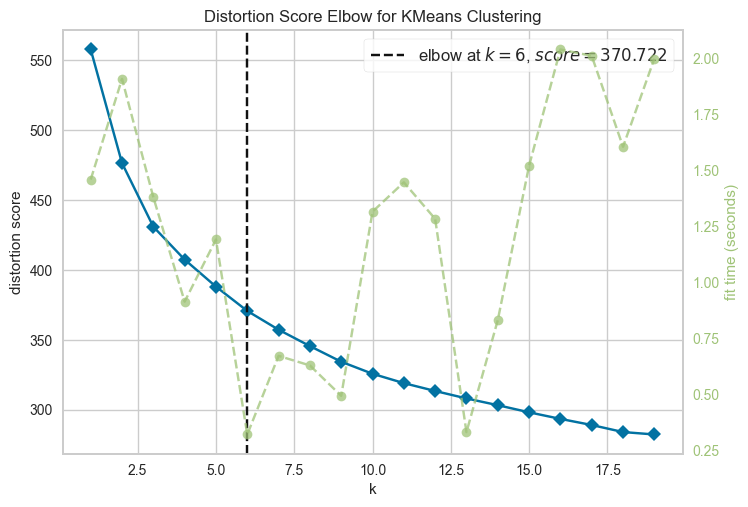

Optimal K:  6


In [33]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 스케일된 데이터
scaled_data = result.iloc[:, 1:].values

# KMeans 모델을 생성
model = KMeans(n_init= 20,init="k-means++", random_state=0)

# KElbowVisualizer를 사용하여 최적의 클러스터 수를 선택
visualizer = KElbowVisualizer(model, k=(1, 20))
visualizer.fit(scaled_data)  # 데이터를 모델에 적합

# Elbow 그래프를 시각화
visualizer.poof()  # 그래프를 보여줍니다.

# 선택된 최적의 클러스터 수
optimal_k = visualizer.elbow_value_
print("Optimal K: ", optimal_k)


In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 스케일된 데이터
scaled_data = result.iloc[:, 1:].values

# K-Means 클러스터링 (6개의 클러스터)
kmeans = KMeans(n_init= 20,init="k-means++", n_clusters=6, random_state=0)
kmeans.fit(scaled_data)

# 클러스터 레이블 얻기
cluster_labels = kmeans.labels_

# Silhouette Score 계산
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.10776227246880517


In [35]:
import pandas as pd

# 스케일된 데이터
scaled_data = result.iloc[:, 1:].values

# K-Means 클러스터링 (2개의 클러스터)
kmeans = KMeans(n_init= 20, init="k-means++",n_clusters=6, random_state=0)
kmeans.fit(scaled_data)

# 클러스터 레이블 얻기
cluster_labels = kmeans.labels_

# Silhouette Score 계산
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# 결과를 기존 데이터프레임에 추가
result['Pitcher_Cluster_Label'] = cluster_labels

# player_id에 속한 클러스터를 나타내는 열을 추가한 결과를 출력
print(result)
result.head()

Silhouette Score: 0.10776227246880517
           p_formatted_ip  k_percent  bb_percent  slg_percent  isolated_power  \
player_id                                                                       
424144           0.057193   0.326260    0.230508     0.189038        0.056075   
425794           0.851863   0.336870    0.157062     0.311708        0.216199   
425844           0.681646   0.290893    0.097175     0.368755        0.254206   
429722           0.332069   0.310345    0.216949     0.399329        0.315888   
431148           0.016924   0.294430    0.318644     0.530201        0.433645   
...                   ...        ...         ...          ...             ...   
686752           0.162825   0.509284    0.522034     0.313199        0.282243   
686753           0.092793   0.461538    0.189831     0.272931        0.173832   
686973           0.103881   0.336870    0.142373     0.409396        0.325234   
689225           0.426029   0.233422    0.200000     0.360179        0.

,p_formatted_ip,k_percent,bb_percent,slg_percent,isolated_power,p_earned_run,p_era,woba,exit_velocity_avg,barrel_batted_rate,...,n_sift_formatted,n_fc_formatted,n_fs_formatted,n_fastball_formatted,fastball_avg_speed,n_breaking_formatted,breaking_avg_speed,breaking_avg_break,n_offspeed_formatted,Pitcher_Cluster_Label
player_id,,,,,,,,,,,,,,,,,,,,,
424144,0.057193,0.326260,0.230508,0.189038,0.056075,0.047619,0.107009,0.222958,0.353846,0.182222,...,0.524710,0.000000,0.0,0.513544,0.394444,0.484493,0.240385,0.394231,0.000000,0
425794,0.851863,0.336870,0.157062,0.311708,0.216199,0.682540,0.176743,0.314202,0.405128,0.281481,...,0.338011,0.296912,0.0,0.554929,0.250000,0.385779,0.105769,0.959936,0.062065,2
425844,0.681646,0.290893,0.097175,0.368755,0.254206,0.654762,0.211700,0.363503,0.423077,0.318519,...,0.031320,0.095847,0.0,0.417607,0.314815,0.345688,0.258013,0.540064,0.261347,5
429722,0.332069,0.310345,0.216949,0.399329,0.315888,0.404762,0.250401,0.408389,0.592308,0.484444,...,0.000000,0.000000,0.0,0.380361,0.588889,0.580938,0.639423,0.158654,0.040532,4
431148,0.016924,0.294430,0.318644,0.530201,0.433645,0.095238,0.339754,0.562914,0.738462,0.586667,...,0.000000,0.000000,0.0,0.487585,0.533333,0.159985,0.769231,0.302885,0.390120,3


In [36]:
result.to_csv('/Users/ahndongsu/Desktop/kmeans_pitcher_by_gpt_pa50.csv', index = True)

In [37]:
result['Pitcher_Cluster_Label'].value_counts()

Pitcher_Cluster_Label
1    225
0    193
5    159
4    123
2    119
3     91
Name: count, dtype: int64

In [38]:
data_1 = pd.read_csv('/Users/ahndongsu/Desktop/kmeans_pitcher_by_gpt_pa50.csv')

In [39]:
data_1.head()

,player_id,p_formatted_ip,k_percent,bb_percent,slg_percent,isolated_power,p_earned_run,p_era,woba,exit_velocity_avg,...,n_sift_formatted,n_fc_formatted,n_fs_formatted,n_fastball_formatted,fastball_avg_speed,n_breaking_formatted,breaking_avg_speed,breaking_avg_break,n_offspeed_formatted,Pitcher_Cluster_Label
0,424144,0.057193,0.326260,0.230508,0.189038,0.056075,0.047619,0.107009,0.222958,0.353846,...,0.524710,0.000000,0.0,0.513544,0.394444,0.484493,0.240385,0.394231,0.000000,0
1,425794,0.851863,0.336870,0.157062,0.311708,0.216199,0.682540,0.176743,0.314202,0.405128,...,0.338011,0.296912,0.0,0.554929,0.250000,0.385779,0.105769,0.959936,0.062065,2
2,425844,0.681646,0.290893,0.097175,0.368755,0.254206,0.654762,0.211700,0.363503,0.423077,...,0.031320,0.095847,0.0,0.417607,0.314815,0.345688,0.258013,0.540064,0.261347,5
3,429722,0.332069,0.310345,0.216949,0.399329,0.315888,0.404762,0.250401,0.408389,0.592308,...,0.000000,0.000000,0.0,0.380361,0.588889,0.580938,0.639423,0.158654,0.040532,4
4,431148,0.016924,0.294430,0.318644,0.530201,0.433645,0.095238,0.339754,0.562914,0.738462,...,0.000000,0.000000,0.0,0.487585,0.533333,0.159985,0.769231,0.302885,0.390120,3


In [41]:
# player_id를 key로 사용하여 두 데이터프레임을 조인
df2 = df1.merge(data_1[['player_id', 'Pitcher_Cluster_Label']], on='player_id', how='inner')

# 결과 데이터프레임에 Batter_Cluster_Label 컬럼이 추가됨
df2.head()

df2.drop('Unnamed: 31', axis=1, inplace=True)


KeyError: "['Unnamed: 31'] not found in axis"

In [42]:
df2.drop('last_name, first_name', axis=1, inplace=True)

In [43]:
df2.head()

,player_id,p_formatted_ip,k_percent,bb_percent,slg_percent,isolated_power,p_earned_run,p_era,woba,exit_velocity_avg,...,n_fc_formatted,n_fs_formatted,n_kn_formatted,n_fastball_formatted,fastball_avg_speed,n_breaking_formatted,breaking_avg_speed,breaking_avg_break,n_offspeed_formatted,Pitcher_Cluster_Label
0,424144,18.0,19.4,8.3,0.258,0.048,4,2.00,0.244,87.1,...,NaN,NaN,NaN,56.9,89.9,43.1,76.1,10.3,NaN,0
1,425794,65.2,20.6,5.7,0.369,0.148,23,3.15,0.277,87.3,...,22.9,NaN,NaN,59.2,87.6,38.3,73.5,22.0,2.5,2
2,425794,206.1,21.0,6.0,0.352,0.132,70,3.05,0.273,88.2,...,22.1,NaN,NaN,59.7,87.5,33.8,73.5,22.2,6.4,2
3,425794,191.2,17.8,6.7,0.382,0.121,79,3.71,0.306,87.8,...,25.3,NaN,NaN,62.8,86.8,31.1,72.9,22.0,6.1,2
4,425844,67.0,24.5,3.3,0.405,0.149,30,4.03,0.293,86.8,...,NaN,NaN,NaN,43.5,88.1,33.2,77.7,12.2,23.3,5


In [44]:
df2[df2['Pitcher_Cluster_Label'] == 0].mean()

player_id                609101.522546
p_formatted_ip               53.422281
k_percent                    20.789125
bb_percent                    8.971883
slg_percent                   0.393159
isolated_power                0.143210
p_earned_run                 24.554377
p_era                         4.363050
woba                          0.314716
exit_velocity_avg            88.234748
barrel_batted_rate            6.458355
hard_hit_percent             38.065517
groundballs_percent          51.444828
flyballs_percent             20.705305
popups_percent                5.186737
n_ff_formatted               12.630892
n_sl_formatted               24.561290
n_ch_formatted               14.206803
n_cukc_formatted             15.387898
n_sift_formatted             45.849072
n_fc_formatted               12.796591
n_fs_formatted               15.657692
n_kn_formatted                     NaN
n_fastball_formatted         59.354377
fastball_avg_speed           93.355968
n_breaking_formatted     

In [45]:
df2[df2['Pitcher_Cluster_Label'] == 1].mean()

player_id                617272.268722
p_formatted_ip               60.998018
k_percent                    24.645595
bb_percent                    9.640529
slg_percent                   0.393912
isolated_power                0.160522
p_earned_run                 26.887665
p_era                         4.156278
woba                          0.308445
exit_velocity_avg            88.897137
barrel_batted_rate            8.040749
hard_hit_percent             38.704185
groundballs_percent          39.910132
flyballs_percent             27.720705
popups_percent                8.156388
n_ff_formatted               51.362335
n_sl_formatted               22.640920
n_ch_formatted               16.486828
n_cukc_formatted              8.914741
n_sift_formatted              9.171429
n_fc_formatted               10.519718
n_fs_formatted               20.827586
n_kn_formatted                     NaN
n_fastball_formatted         56.679956
fastball_avg_speed           94.308150
n_breaking_formatted     

In [46]:
df2[df2['Pitcher_Cluster_Label'] == 2].mean()

player_id                575010.477912
p_formatted_ip               64.454217
k_percent                    21.195181
bb_percent                    8.244578
slg_percent                   0.414353
isolated_power                0.166112
p_earned_run                 29.433735
p_era                         4.381807
woba                          0.317241
exit_velocity_avg            88.122088
barrel_batted_rate            7.606426
hard_hit_percent             36.971084
groundballs_percent          42.831727
flyballs_percent             25.531325
popups_percent                7.489558
n_ff_formatted               26.284279
n_sl_formatted                9.993519
n_ch_formatted               14.939901
n_cukc_formatted             13.002913
n_sift_formatted             20.941053
n_fc_formatted               31.881034
n_fs_formatted               11.138095
n_kn_formatted                     NaN
n_fastball_formatted         69.855823
fastball_avg_speed           90.393976
n_breaking_formatted     

In [47]:
df2[df2['Pitcher_Cluster_Label'] == 3].mean()

player_id                617361.363636
p_formatted_ip               31.405303
k_percent                    18.037121
bb_percent                    9.960606
slg_percent                   0.579689
isolated_power                0.277795
p_earned_run                 22.924242
p_era                         7.513939
woba                          0.402758
exit_velocity_avg            90.390909
barrel_batted_rate           11.390152
hard_hit_percent             43.614394
groundballs_percent          36.378030
flyballs_percent             29.900758
popups_percent                7.928030
n_ff_formatted               43.400763
n_sl_formatted               21.515044
n_ch_formatted               13.345133
n_cukc_formatted             13.175472
n_sift_formatted             14.163291
n_fc_formatted               16.836585
n_fs_formatted               17.677778
n_kn_formatted                     NaN
n_fastball_formatted         56.775000
fastball_avg_speed           91.947727
n_breaking_formatted     

In [48]:
df2[df2['Pitcher_Cluster_Label'] == 4].mean()

player_id                609998.291480
p_formatted_ip               39.563229
k_percent                    25.538117
bb_percent                    9.569507
slg_percent                   0.378915
isolated_power                0.151543
p_earned_run                 16.452915
p_era                         3.952780
woba                          0.301861
exit_velocity_avg            88.369058
barrel_batted_rate            7.338117
hard_hit_percent             36.878475
groundballs_percent          43.284305
flyballs_percent             25.883408
popups_percent                7.584753
n_ff_formatted               34.631507
n_sl_formatted               46.574324
n_ch_formatted                5.848438
n_cukc_formatted             13.142045
n_sift_formatted             13.165248
n_fc_formatted               14.709091
n_fs_formatted               10.231250
n_kn_formatted                     NaN
n_fastball_formatted         43.786547
fastball_avg_speed           93.745291
n_breaking_formatted     

In [49]:
df2[df2['Pitcher_Cluster_Label'] == 5].mean()

player_id                609917.062696
p_formatted_ip               63.152351
k_percent                    24.488088
bb_percent                    9.167085
slg_percent                   0.392056
isolated_power                0.156837
p_earned_run                 27.319749
p_era                         4.139624
woba                          0.308166
exit_velocity_avg            88.580564
barrel_batted_rate            7.455799
hard_hit_percent             37.634483
groundballs_percent          41.700940
flyballs_percent             26.191223
popups_percent                7.951411
n_ff_formatted               45.107210
n_sl_formatted               14.855215
n_ch_formatted               12.420417
n_cukc_formatted             22.657586
n_sift_formatted             11.610825
n_fc_formatted               11.752174
n_fs_formatted               14.495455
n_kn_formatted                     NaN
n_fastball_formatted         55.562069
fastball_avg_speed           92.987774
n_breaking_formatted     

## 합치는 법 